# Wai Yu Amanda, Ng
## 1008217350
## ngwai11

# PART I

In [1]:
# Import dataset "Crime Replication Dataset" 
import pandas as pd; import numpy as np; from scipy import stats; import matplotlib.pyplot as plt; import random 
url = "https://github.com/amanda-ng518/STA365/blob/62e724be1797cc0eb1e6524d3c5bd557e11424e1/crime_replication.csv?raw=true" 
df = pd.read_csv(url) 
random.seed(1008217350)

We will use 'state_anxiety' and 'trait_anxiety' to form the predictor vector X and 'fear_of_crime' as the outcome vector y.

In [2]:
X = df[['state_anxiety', 'trait_anxiety']].to_numpy()
y = df[["fear_of_crime"]].to_numpy()

Let us plot some graphs to visualize the distribution of the outcome variable.

Text(0.5, 1.0, 'Histogram of fear_of_crime')

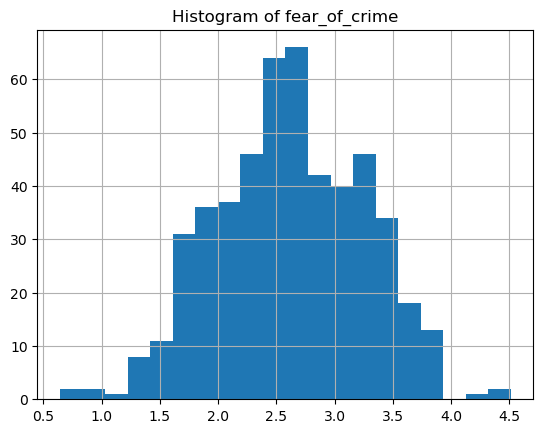

In [3]:
df.hist(column = "fear_of_crime", bins=20) 
plt.title('Histogram of fear_of_crime')

As seen above, it looks fairly normal with mean centered at around 2.5 and extend towards 0.5 and 4.5. The distribution looks like a truncated standard normal distribution which is further compressed. So we can expect the variance of y is less than 1. Therefore, we impose an exponential ($\lambda$ = 1) prior to sigma.

In [ ]:
import pymc as pm
p= 2
with pm.Model() as MLR:
    betas = pm.MvNormal('betas', mu=np.zeros((p,1)), cov=np.eye(p), shape=(p,1))
    sigma = pm.Exponential('sigma', lam=1) # exponential prior
    y = pm.Normal('y', mu=pm.math.dot(X, betas), sigma=sigma, observed=y)

with MLR:
    idata = pm.sample()

# Part II

## 1. Rewrite $p(\boldsymbol \beta |\boldsymbol\Sigma, \mathbf{X},\mathbf{y})$ in terms of $\sigma^2$ (no longer using $\Sigma$) if $\Sigma=\sigma^2I$

Given
\begin{align*}
p(\boldsymbol \beta |\boldsymbol\Sigma, \mathbf{X},\mathbf{y}) = {}& \mathcal{MVN}\left(\overset{E[\boldsymbol \beta | \boldsymbol\Sigma, \mathbf{X},\mathbf{y}] \; = \quad\quad}{\text{Cov}[\boldsymbol \beta | \boldsymbol\Sigma, \mathbf{X},\mathbf{y}]}\bigg( \mathbf{X}^\top \boldsymbol\Sigma^{-1}\mathbf{y} + \boldsymbol \Sigma_\beta^{-1}\boldsymbol\beta_0 \right), \text{Cov}[\boldsymbol \beta | \boldsymbol\Sigma, \mathbf{X},\mathbf{y}] = \left[\mathbf{X}^{\top}\boldsymbol \Sigma^{-1} \mathbf{X}  + \boldsymbol \Sigma_\beta^{-1} \right]^{-1} \bigg)\\
\end{align*}

Then we substitute $\Sigma=\sigma^2I$ and get 
\begin{align*}
p(\boldsymbol \beta |\boldsymbol\sigma^2I, \mathbf{X},\mathbf{y}) = {}& \mathcal{MVN}\left(\overset{E[\boldsymbol \beta | \boldsymbol\sigma^2I, \mathbf{X},\mathbf{y}] \; = \quad\quad}{\text{Cov}[\boldsymbol \beta | \boldsymbol\sigma^2I, \mathbf{X},\mathbf{y}]}\bigg( \mathbf{X}^\top \boldsymbol(\sigma^2I)^{-1}\mathbf{y} + \boldsymbol \Sigma_\beta^{-1}\boldsymbol\beta_0 \right), \text{Cov}[\boldsymbol \beta | \boldsymbol\sigma^2I, \mathbf{X},\mathbf{y}] = \left[\mathbf{X}^{\top}\boldsymbol (\sigma^2I)^{-1} \mathbf{X}  + \boldsymbol \Sigma_\beta^{-1} \right]^{-1} \bigg)\\
\end{align*}


Note that $(\sigma^2I)^{-1}$ = $\frac{1}{\sigma^2}I$, so we can further simplify it to

\begin{align*}
p(\boldsymbol \beta |\boldsymbol\sigma^2I, \mathbf{X},\mathbf{y}) = {}& \mathcal{MVN}\left(\overset{E[\boldsymbol \beta | \boldsymbol\sigma^2I, \mathbf{X},\mathbf{y}] \; = \quad\quad}{\text{Cov}[\boldsymbol \beta | \boldsymbol\sigma^2I, \mathbf{X},\mathbf{y}]}\bigg( \mathbf{X}^\top \boldsymbol(\frac{1}{\sigma^2})\mathbf{y} + \boldsymbol \Sigma_\beta^{-1}\boldsymbol\beta_0 \right), \text{Cov}[\boldsymbol \beta | \boldsymbol\sigma^2I, \mathbf{X},\mathbf{y}] = \left[\mathbf{X}^{\top}\boldsymbol (\frac{1}{\sigma^2}) \mathbf{X}  + \boldsymbol \Sigma_\beta^{-1} \right]^{-1} \bigg)\\
= {}& \mathcal{MVN}\left(\overset{E[\boldsymbol \beta | \boldsymbol\sigma^2I, \mathbf{X},\mathbf{y}] \; = \quad\quad}{\text{Cov}[\boldsymbol \beta | \boldsymbol\sigma^2I, \mathbf{X},\mathbf{y}]}\bigg(\boldsymbol(\frac{1}{\sigma^2}) \mathbf{X}^\top \mathbf{y} + \boldsymbol \Sigma_\beta^{-1}\boldsymbol\beta_0 \right), \text{Cov}[\boldsymbol \beta | \boldsymbol\sigma^2I, \mathbf{X},\mathbf{y}] = \left[\boldsymbol(\frac{1}{\sigma^2}) \mathbf{X}^{\top}\mathbf{X}  + \boldsymbol \Sigma_\beta^{-1} \right]^{-1} \bigg)\\
= {}& \mathcal{MVN}\left(\left[\boldsymbol(\frac{1}{\sigma^2}) \mathbf{X}^{\top}\mathbf{X}  + \boldsymbol \Sigma_\beta^{-1} \right]^{-1} \bigg(\boldsymbol(\frac{1}{\sigma^2}) \mathbf{X}^\top \mathbf{y} + \boldsymbol \Sigma_\beta^{-1}\boldsymbol\beta_0 \right), \left[\boldsymbol(\frac{1}{\sigma^2}) \mathbf{X}^{\top}\mathbf{X}  + \boldsymbol \Sigma_\beta^{-1} \right]^{-1} \bigg)\\
\end{align*}

## 2. What is $E[\boldsymbol \beta |\boldsymbol\Sigma, \mathbf{X},\mathbf{y}]$?

$
\left[\boldsymbol(\frac{1}{\sigma^2}) \mathbf{X}^{\top}\mathbf{X}  + \boldsymbol \Sigma_\beta^{-1} \right]^{-1} \bigg(\boldsymbol(\frac{1}{\sigma^2}) \mathbf{X}^\top \mathbf{y} + \boldsymbol \Sigma_\beta^{-1}\boldsymbol\beta_0\bigg)
$

## 3. What ***hyperparameters*** values (legal or illegal) would make $E[\boldsymbol \beta |\boldsymbol\Sigma, \mathbf{X},\mathbf{y}] = (\mathbf{X^\top X})^{-1}\mathbf{X^\top y}$?

We want
$
\left[\mathbf{X}^{\top}\boldsymbol \Sigma^{-1} \mathbf{X}  + \boldsymbol \Sigma_\beta^{-1} \right]^{-1} \left( \mathbf{X}^\top \boldsymbol\Sigma^{-1}\mathbf{y} + \boldsymbol \Sigma_\beta^{-1}\boldsymbol\beta_0 \right)
= (\mathbf{X^\top X})^{-1}\mathbf{X^\top y}
$

Oberve that $(\mathbf{X^\top X})^{-1}\mathbf{X^\top y}
= \mathbf{X}^{-1}(\mathbf{X^\top})^{-1}\mathbf{X^\top y}
= \mathbf{X}^{-1}\mathbf{y}$

Then, let us look at the term $\left[\mathbf{X}^{\top}\boldsymbol \Sigma^{-1} \mathbf{X}  + \boldsymbol \Sigma_\beta^{-1} \right]^{-1} \mathbf{X}^\top \boldsymbol\Sigma^{-1}\mathbf{y}$

If we take $\boldsymbol \Sigma_\beta^{-1}$ to be a zero matrix, we have with 

\begin{align*}
\left[\mathbf{X}^{\top}\boldsymbol \Sigma^{-1} \mathbf{X}  + \boldsymbol \Sigma_\beta^{-1} \right]^{-1} \mathbf{X}^\top \boldsymbol\Sigma^{-1}\mathbf{y} = \left[\mathbf{X}^{\top}\boldsymbol \Sigma^{-1} \mathbf{X} \right]^{-1} \mathbf{X}^\top \boldsymbol\Sigma^{-1}\mathbf{y}\\
= \mathbf{X} ^{-1}\boldsymbol (\Sigma^{-1})^{-1} (\mathbf{X}^{\top})^{-1} \mathbf{X}^\top \boldsymbol\Sigma^{-1}\mathbf{y}\\
= \mathbf{X} ^{-1}(\boldsymbol\Sigma^{-1})^{-1} \boldsymbol\Sigma^{-1}\mathbf{y}\\
= \mathbf{X} ^{-1}\boldsymbol\Sigma \boldsymbol\Sigma^{-1}\mathbf{y}\\
= \mathbf{X} ^{-1}\mathbf{y}\\
\end{align*}

as desired.

So we require hyperparameter $\boldsymbol \Sigma_\beta^{-1}$ to be a zero matrix while $\boldsymbol\beta_0$ has no additional restriction.

## 4. What ***hyperparameters*** values (legal or illegal) would make $E[  \mathbf{\hat y} = \mathbf{X}\boldsymbol \beta |\boldsymbol\Sigma, \mathbf{X},\mathbf{y}] = \mathbf{X}(\mathbf{X^\top X})^{-1}\mathbf{X^\top y}$?

Note that $E[\mathbf{\hat y} = \mathbf{X}\boldsymbol \beta |\boldsymbol\Sigma, \mathbf{X},\mathbf{y}] = \mathbf{X}E[\boldsymbol \beta |\boldsymbol\Sigma, \mathbf{X},\mathbf{y}]$ since X is observed data which can be evaluated as some fixed vector.
Hence, we are looking for $\mathbf{X}E[\boldsymbol \beta |\boldsymbol\Sigma, \mathbf{X},\mathbf{y}] = \mathbf{X}(\mathbf{X^\top X})^{-1}\mathbf{X^\top y}$. By cancelling X on both sides, it reduces back to question 3: $E[\boldsymbol \beta |\boldsymbol\Sigma, \mathbf{X},\mathbf{y}] = (\mathbf{X^\top X})^{-1}\mathbf{X^\top y}$. Therefore, we also require hyperparameter $\boldsymbol \Sigma_\beta^{-1}$ to be a zero matrix.

## 5. What is $\text{Var}[\boldsymbol \beta |\boldsymbol\Sigma, \mathbf{X},\mathbf{y}]$?

$\left[\boldsymbol(\frac{1}{\sigma^2}) \mathbf{X}^{\top}\mathbf{X}  + \boldsymbol \Sigma_\beta^{-1} \right]^{-1}$

# Part III

In [ ]:
import pymc as pm

n=1; p=2; y=df[["fear_of_crime"]].to_numpy()
    
with pm.Model() as MNV:
    # Prior on mu
    mu = pm.Normal('mu', mu=0, sigma=15, shape=p)
    
    # Cholesky factor
    chol_packed = pm.LKJCholeskyCov("chol_packed", n=p, eta=2.0,
                                 sd_dist=pm.Exponential.dist(1.0, shape=2), compute_corr=False)
    chol = pm.expand_packed_triangular(p, chol_packed)
    
    y = pm.MvNormal('y', mu=mu, chol = chol, observed = y) # Using Cholesky factor parameterization directly in MVN

with MNV:    
    idata = pm.sample(chains = 2)